## 30일차 강의 (2021.8.13)
# 신경망

### 연습문제
- 미니배치는 입력데이터를 여러 조각으로 나누어 각자 훈련시키는 것이다.
- 행복데이터에서 배치 크기를 64로 해서 각 배치의 출력값과 오차값을 계산해보자. (배치를 자르기 전에 먼저 데이터를 섞어야 한다.)
- 주요 속성 6개를 입력값으로, 행복지수를 출력값으로 하는 회귀 문제이다.
- 중간층은 하나이며 256개의 노드를 가진다. 중간층의 활성화 함수는 시그모이드이다.
- 가능하면 입력데이터를 정규화한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.shape

(149, 20)

In [4]:
X = happy.iloc[:,6:12].values
y = happy['Ladder score'].values

In [6]:
idx = np.random.permutation(range(149))
idx

array([ 54, 115,  53,  64,  34, 135,  18,   8, 142, 132, 148, 144, 101,
         6,  31, 127,  37, 118, 119,  39,   2, 121,  38, 125,  98,  33,
        63,  46,  47,  58,  36,  26,  43, 106,  99, 140, 112, 100, 110,
         9,  65,  48, 104,  57, 102, 130,  40,  56,  77, 120,  92,  67,
       117, 128,  62, 124,  60,   7,  88,   3,  24, 141,  61, 137, 114,
        85, 107, 146,  22, 134,  25,  95,  70, 129,  12,  11, 105, 145,
        93, 103,  69, 126,  45,   0, 139,  73,  84, 109,  79,  91,  89,
        17, 116,  21,   4,  87, 111,   5,  90,  29,  23,  52,  75,  86,
        76,  27,  97, 131, 113,  42,  35,  51,  50,  59, 143, 136,  74,
        28,  20, 133,  68,  14,  13,  10,  15,  32,  71,  78, 147, 108,
        19,  66, 138,  82,  96,  16,  30,  44,  81,  94,   1,  80,  72,
       123, 122,  55,  83,  41,  49])

In [10]:
X1 = X[idx[:64]]
y1 = y[idx[:64]]
X1 = (X1 - X1.mean(axis=0)) / X1.std(axis=0)
X1.shape, y1.shape

((64, 6), (64,))

In [11]:
X2 = X[idx[64:128]]
y2 = y[idx[64:128]]
X2 = (X2 - X2.mean(axis=0)) / X2.std(axis=0)
X2.shape, y2.shape

((64, 6), (64,))

In [12]:
X3 = X[idx[128:]]
y3 = y[idx[128:]]
X3 = (X3 - X3.mean(axis=0)) / X3.std(axis=0)
X3.shape, y3.shape

((21, 6), (21,))

In [3]:
import tensorflow as tf
from tensorflow import keras

In [14]:
tf.nn.relu([-3,-2,-1,0,1,2,3])

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 0, 0, 0, 1, 2, 3])>

In [17]:
tf.math.sin(0.).numpy()

0.0

### MNIST 경사하강법 적용

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train.min(), X_train.max()

(0, 255)

Text(0.5, 1.0, '5')

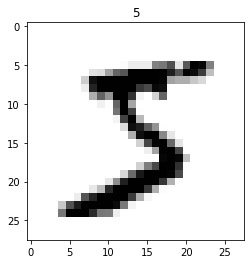

In [6]:
plt.imshow(X_train[0], cmap='gray_r', vmin=0, vmax=255)
plt.title(y_train[0])

In [7]:
X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1,28*28)/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
# 가중치 초기화
W = tf.Variable(np.random.normal(0, 0.1, size=[784,10]))
b = tf.Variable(np.zeros(10))

y_onehot = np.eye(10)[y_train]
eps = np.finfo(float).eps
lr = 0.1
losses = []

for epoch in range(10):
    with tf.GradientTape() as tape:
        pred_y = tf.nn.softmax(X_train@W + b)
        # categorical cross-entropy : -log(p)
        loss = tf.reduce_sum(-y_onehot*tf.math.log(pred_y+eps)) / len(y_train)
        
    W_grads, b_grads = tape.gradient(loss, [W,b]) # 기울기를 구함
    
    W.assign_sub(lr*W_grads)
    b.assign_sub(lr*b_grads)
    
    losses.append(loss.numpy())
    print(epoch, loss.numpy())

0 2.6863733916304624
1 2.5029410685145024
2 2.3655447320739897
3 2.250500081998989
4 2.149994053659922
5 2.060288619129308
6 1.979053966370025
7 1.9046631576212585
8 1.8359888912185245
9 1.7722696064812165


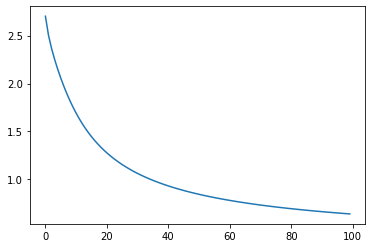

In [51]:
plt.plot(losses)

In [60]:
# 가중치 초기화
W = tf.Variable(np.random.normal(0, 0.1, size=[784,10]))
b = tf.Variable(np.zeros(10))

y_onehot = np.eye(10)[y_train]
eps = np.finfo(float).eps
lr = 0.1
losses = []

for epoch in range(10):
    for batch in range(600): # batch_size=100
        with tf.GradientTape() as tape:
            pred_y = tf.nn.softmax(X_train[batch*100:(batch+1)*100]@W + b)
            # categorical cross-entropy : -log(p)
            loss = tf.reduce_sum(-y_onehot[batch*100:(batch+1)*100]*tf.math.log(pred_y+eps))/100

        W_grads, b_grads = tape.gradient(loss, [W,b]) # 기울기를 구함

        W.assign_sub(lr*W_grads)
        b.assign_sub(lr*b_grads)
    
    losses.append(loss.numpy())
    print(epoch, loss.numpy())

0 0.43802610857465224
1 0.3820200167254793
2 0.359298177209226
3 0.345961321198954
4 0.3366832847189671
5 0.329592943488348
6 0.3238549126610683
7 0.3190333654294544
8 0.31487429440112263
9 0.3112169462706537


### Keras

In [11]:
from tensorflow import keras # tensorflow 2.0
keras.optimizers.RMSprop

tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop

In [10]:
tf.keras.optimizers.RMSprop

tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='sgd')
y_onehot = np.eye(10)[y_train]
model.fit(X_train, y_onehot, batch_size=100, epochs=100)

Epoch 1/100
600/600 [==============================] - 2s 2ms/step - loss: 1.5397
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.6951
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.5619
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.5069
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4614
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4425
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4181
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4113
Epoch 9/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3998
Epoch 10/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3885
Epoch 11/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3824
Epoch 12/100
600/600 [==============================] - 1s 2ms/step - loss: 0.3737
Epoch 13/100


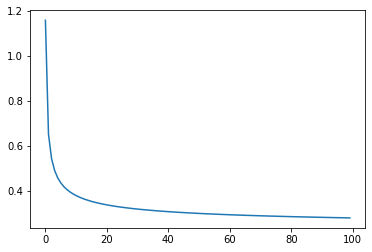

In [18]:
h = model.history.history
plt.plot(h['loss'])

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])
y_onehot = np.eye(10)[y_train]
model.fit(X_train, y_onehot, batch_size=100, epochs=100, validation_split=0.2)

Epoch 1/100
480/480 [==============================] - 3s 5ms/step - loss: 1.6837 - acc: 0.5144 - val_loss: 0.8080 - val_acc: 0.8408
Epoch 2/100
480/480 [==============================] - 2s 3ms/step - loss: 0.7714 - acc: 0.8324 - val_loss: 0.5992 - val_acc: 0.8673
Epoch 3/100
480/480 [==============================] - 2s 3ms/step - loss: 0.6150 - acc: 0.8536 - val_loss: 0.5173 - val_acc: 0.8773
Epoch 4/100
480/480 [==============================] - 2s 3ms/step - loss: 0.5374 - acc: 0.8679 - val_loss: 0.4723 - val_acc: 0.8842
Epoch 5/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4992 - acc: 0.8731 - val_loss: 0.4435 - val_acc: 0.8881
Epoch 6/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4648 - acc: 0.8794 - val_loss: 0.4230 - val_acc: 0.8923
Epoch 7/100
480/480 [==============================] - 2s 3ms/step - loss: 0.4431 - acc: 0.8848 - val_loss: 0.4075 - val_acc: 0.8951
Epoch 8/100
480/480 [==============================] - 2s 3ms/step - 

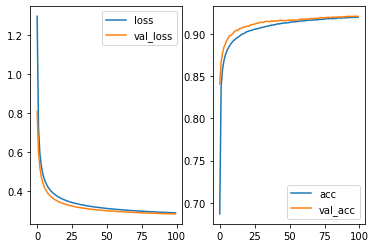

In [24]:
h = model.history.history

plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

In [27]:
result = model.predict(X_test)
result

array([[6.0213551e-05, 8.5191143e-09, 1.5248805e-04, ..., 9.9469841e-01,
        3.9336184e-05, 6.5456383e-04],
       [2.7273651e-03, 3.5599322e-05, 9.6333748e-01, ..., 6.9802518e-11,
        1.6895485e-03, 2.9965157e-08],
       [2.0482685e-05, 9.7077638e-01, 1.3074989e-02, ..., 3.4088865e-03,
        4.6214736e-03, 5.6658074e-04],
       ...,
       [2.6468837e-07, 6.1233129e-07, 2.8345265e-05, ..., 1.7783291e-03,
        8.6966325e-03, 2.0724289e-02],
       [1.2619262e-04, 4.3627375e-04, 1.7127239e-04, ..., 2.6158454e-05,
        1.4789498e-01, 8.9604124e-05],
       [6.3439227e-05, 2.5354258e-10, 3.1296481e-04, ..., 1.4064322e-09,
        1.1906227e-06, 4.9025331e-08]], dtype=float32)

In [28]:
result.shape

(10000, 10)

In [29]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [30]:
result[0]

array([6.0213551e-05, 8.5191143e-09, 1.5248805e-04, 4.3630870e-03,
       3.5522455e-06, 2.8397579e-05, 3.4772786e-08, 9.9469841e-01,
       3.9336184e-05, 6.5456383e-04], dtype=float32)

In [32]:
result[0].argmax()

7

In [33]:
result.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [34]:
# 테스트 데이터에 대한 정확도
(result.argmax(axis=1)==y_test).mean()

0.9218

In [35]:
(result.argmax(axis=1)==y_test).sum()

9218